<a href="https://colab.research.google.com/github/Abishethvarman/CrossDomain-Interpretable-Regression/blob/main/07-Paddy/Nb_07_paddy_feat_lvl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#csv upload
from google.colab import files
uploaded = files.upload()

Saving 2021_2022 Maha.csv to 2021_2022 Maha.csv


In [2]:
!pip install tensorflow

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn  # Import sklearn after installing the specific version
sklearn.set_config(display='text')
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

import tensorflow as tf

In [5]:
df = pd.read_csv('2021_2022 Maha.csv')

In [6]:
df

,District,Major_Schemes_Sown,Minor_Schemes_Sown,Rainfed_Sown,All_Schemes_Sown,Major_Schemes_Harvested,Minor_Schemes_Harvested,Rainfed_Harvested,All_Schemes_Harvested,Major_Schemes_Yield,Minor_Schemes_Yield,Rainfed_Yield,Average_Yield,Nett_Extent_Harvested,Total_Production
0,COLOMBO,324,710,2796,3830,324,710,2777,3811,3321,2236,2500,2521,3239,8166
1,GAMPAHA,1659,3076,6776,11511,1556,3036,6610,11202,2056,2671,3105,2842,9522,27059
2,KALUTARA,145,1573,10221,11939,129,1544,9893,11566,3716,2341,2583,2563,10669,27349
3,KANDY,4268,5181,2762,12211,4268,5176,2757,12201,3092,3190,3540,3235,9649,31211
4,MATALE,7628,7839,4525,19992,7593,7815,4512,19920,3089,3601,3304,3339,17914,59812
5,NUWARAELIYA,900,4133,11,5044,900,4126,8,5034,4652,3763,3870,3922,2836,11126
6,GALLE,144,1756,9335,11235,144,1706,9071,10921,2653,2825,2453,2514,8546,21486
7,MATARA,4259,3193,6233,13685,4105,2963,6110,13178,3149,2625,2573,2764,10404,28761
8,HAMBANTOTA,29498,5463,1143,36104,29438,5438,1131,36007,4144,3180,3202,3969,31459,124870
9,JAFFNA,-,-,11127,11127,-,-,7775,7775,-,-,2176,2176,6899,15013


In [7]:
df= df.drop(columns=['District'], axis = 1)

In [8]:
df

,Major_Schemes_Sown,Minor_Schemes_Sown,Rainfed_Sown,All_Schemes_Sown,Major_Schemes_Harvested,Minor_Schemes_Harvested,Rainfed_Harvested,All_Schemes_Harvested,Major_Schemes_Yield,Minor_Schemes_Yield,Rainfed_Yield,Average_Yield,Nett_Extent_Harvested,Total_Production
0,324,710,2796,3830,324,710,2777,3811,3321,2236,2500,2521,3239,8166
1,1659,3076,6776,11511,1556,3036,6610,11202,2056,2671,3105,2842,9522,27059
2,145,1573,10221,11939,129,1544,9893,11566,3716,2341,2583,2563,10669,27349
3,4268,5181,2762,12211,4268,5176,2757,12201,3092,3190,3540,3235,9649,31211
4,7628,7839,4525,19992,7593,7815,4512,19920,3089,3601,3304,3339,17914,59812
5,900,4133,11,5044,900,4126,8,5034,4652,3763,3870,3922,2836,11126
6,144,1756,9335,11235,144,1706,9071,10921,2653,2825,2453,2514,8546,21486
7,4259,3193,6233,13685,4105,2963,6110,13178,3149,2625,2573,2764,10404,28761
8,29498,5463,1143,36104,29438,5438,1131,36007,4144,3180,3202,3969,31459,124870
9,-,-,11127,11127,-,-,7775,7775,-,-,2176,2176,6899,15013


In [11]:
df_clean = df.copy()

In [12]:
df_clean

,Major_Schemes_Sown,Minor_Schemes_Sown,Rainfed_Sown,All_Schemes_Sown,Major_Schemes_Harvested,Minor_Schemes_Harvested,Rainfed_Harvested,All_Schemes_Harvested,Major_Schemes_Yield,Minor_Schemes_Yield,Rainfed_Yield,Average_Yield,Nett_Extent_Harvested,Total_Production
0,324,710,2796,3830,324,710,2777,3811,3321,2236,2500,2521,3239,8166
1,1659,3076,6776,11511,1556,3036,6610,11202,2056,2671,3105,2842,9522,27059
2,145,1573,10221,11939,129,1544,9893,11566,3716,2341,2583,2563,10669,27349
3,4268,5181,2762,12211,4268,5176,2757,12201,3092,3190,3540,3235,9649,31211
4,7628,7839,4525,19992,7593,7815,4512,19920,3089,3601,3304,3339,17914,59812
5,900,4133,11,5044,900,4126,8,5034,4652,3763,3870,3922,2836,11126
6,144,1756,9335,11235,144,1706,9071,10921,2653,2825,2453,2514,8546,21486
7,4259,3193,6233,13685,4105,2963,6110,13178,3149,2625,2573,2764,10404,28761
8,29498,5463,1143,36104,29438,5438,1131,36007,4144,3180,3202,3969,31459,124870
9,-,-,11127,11127,-,-,7775,7775,-,-,2176,2176,6899,15013


XGBoost Model – Test Data
RMSE: 33526.7984
MAE : 27480.0801
R²  : 0.4282



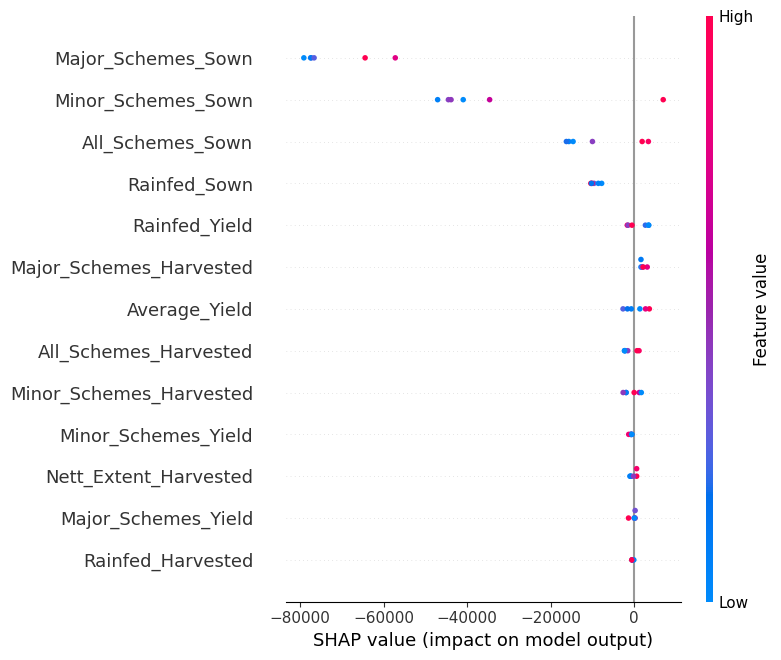

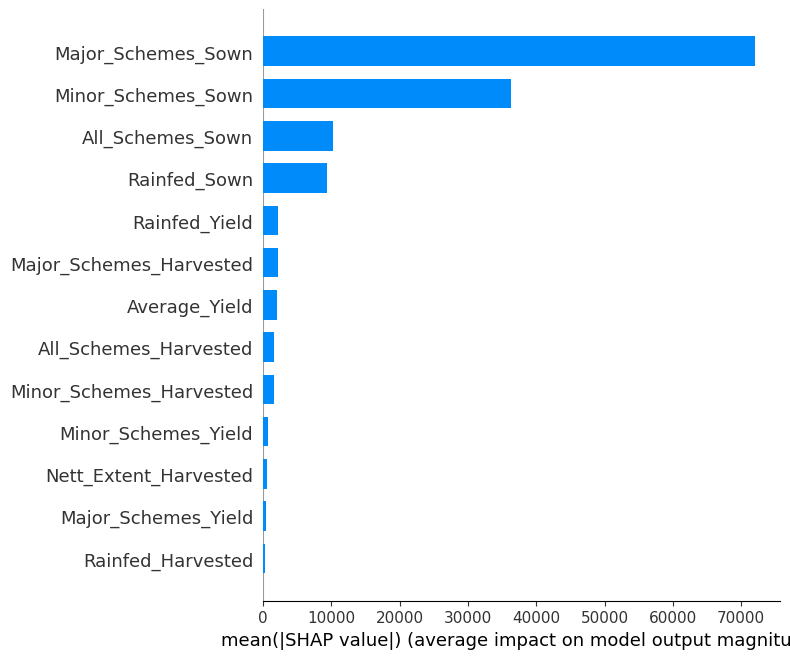

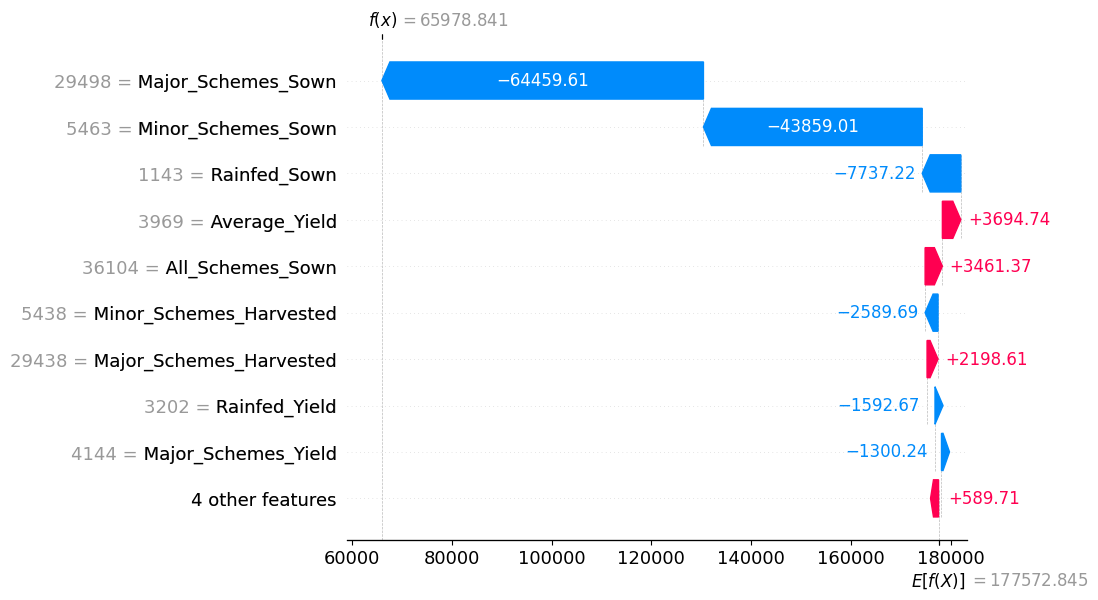

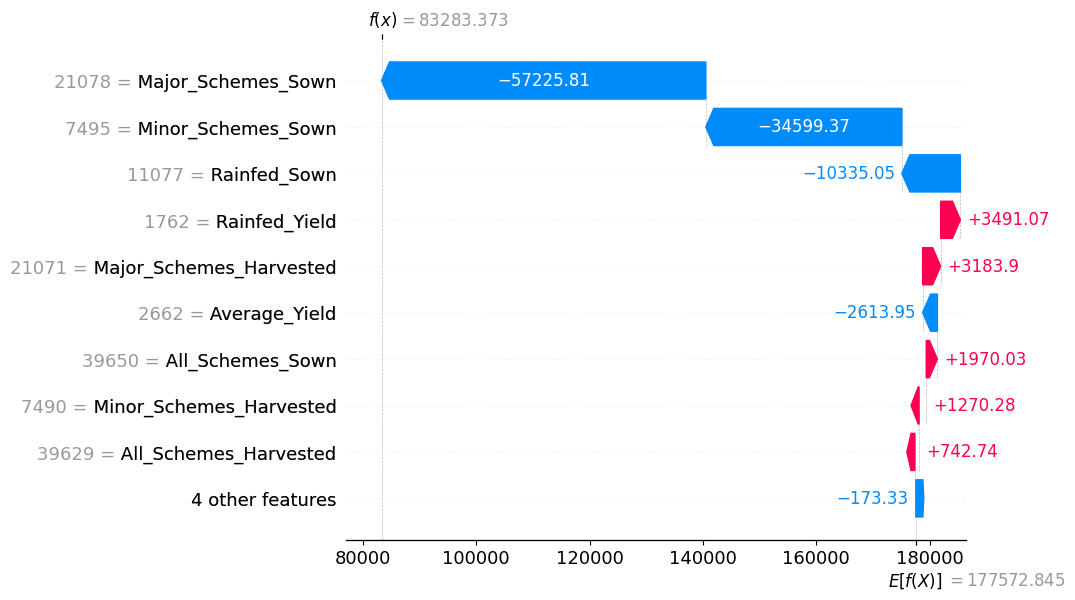

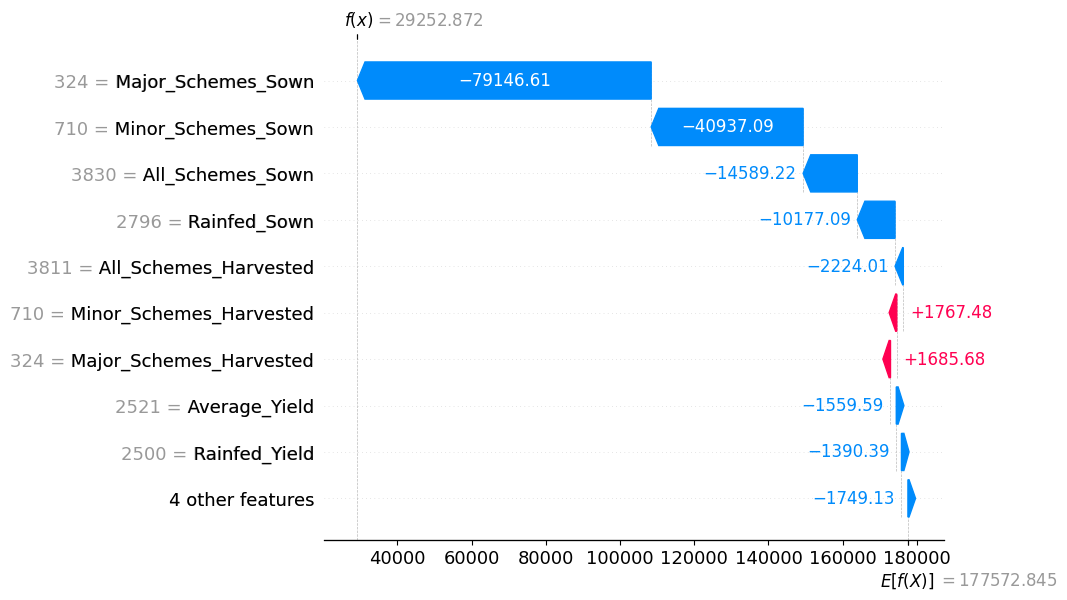

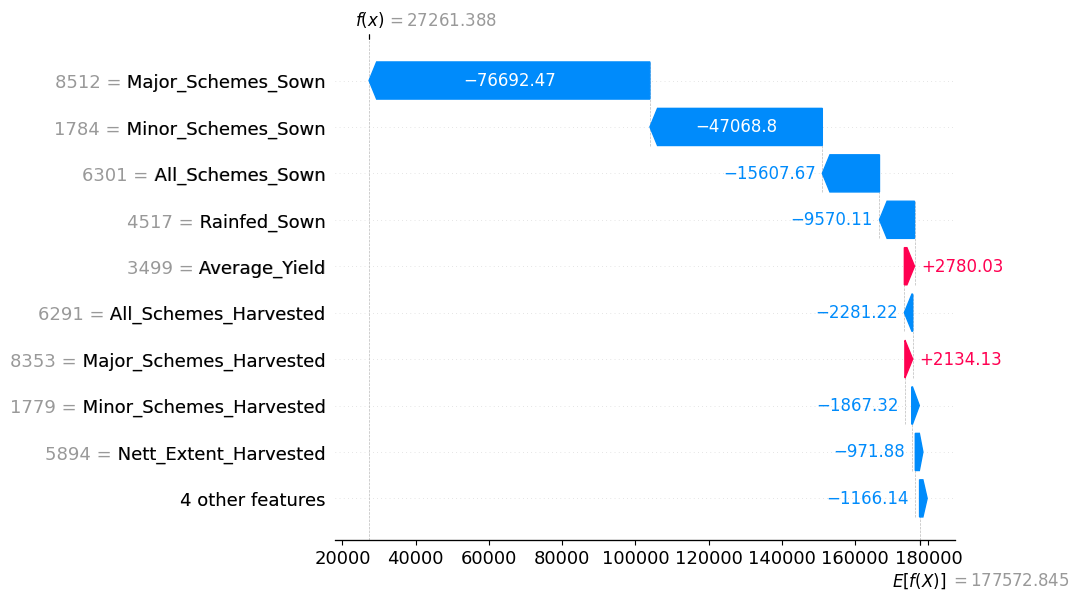

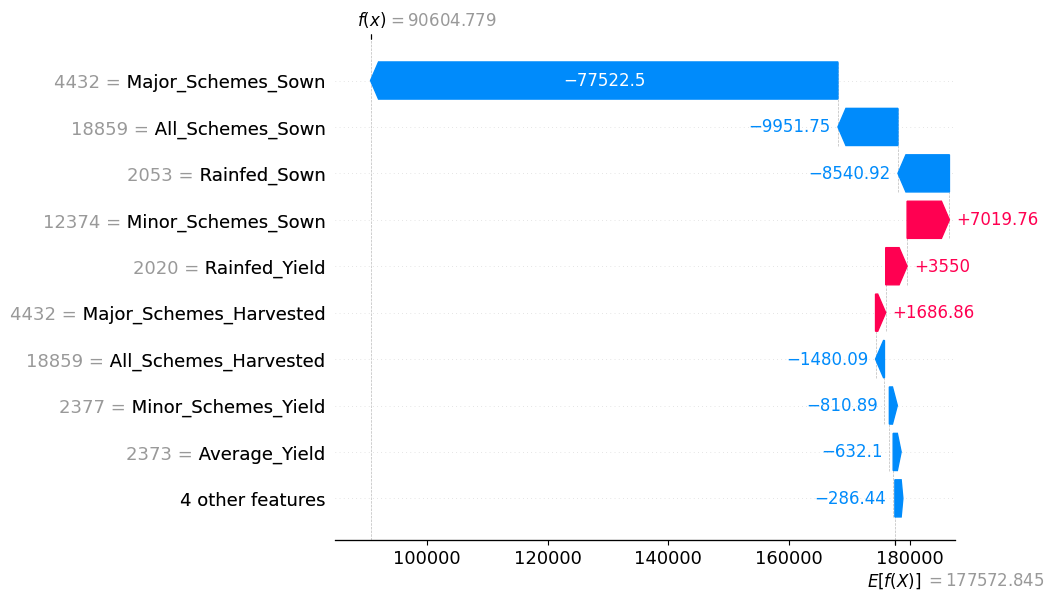

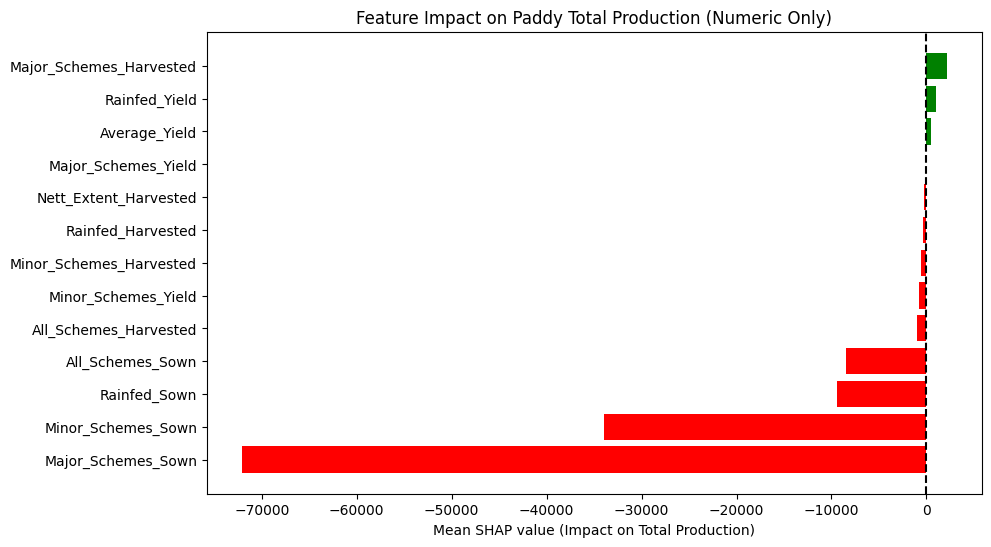

Feature contributions for sample 0
Major_Schemes_Sown: Feature Value = 29498.0, SHAP Value = -64459.6077119723
Minor_Schemes_Sown: Feature Value = 5463.0, SHAP Value = -43859.011695571244
Rainfed_Sown: Feature Value = 1143.0, SHAP Value = -7737.219709044695
All_Schemes_Sown: Feature Value = 36104.0, SHAP Value = 3461.3726813159883
Major_Schemes_Harvested: Feature Value = 29438.0, SHAP Value = 2198.6129458576443
Minor_Schemes_Harvested: Feature Value = 5438.0, SHAP Value = -2589.6902664899826
Rainfed_Harvested: Feature Value = 1131.0, SHAP Value = -26.962948006391525
All_Schemes_Harvested: Feature Value = 36007.0, SHAP Value = 1222.255230987072
Major_Schemes_Yield: Feature Value = 4144.0, SHAP Value = -1300.2430428585037
Minor_Schemes_Yield: Feature Value = 3180.0, SHAP Value = -1251.2855242595076
Rainfed_Yield: Feature Value = 3202.0, SHAP Value = -1592.6665983736516
Average_Yield: Feature Value = 3969.0, SHAP Value = 3694.743314304948
Nett_Extent_Harvested: Feature Value = 31459.0, SH

In [14]:
# 1️⃣ Install packages if needed
!pip install xgboost shap --quiet

# 2️⃣ Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
import shap
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 3️⃣ Data cleaning (if not already done)
object_numeric_cols = [
    'Major_Schemes_Sown',
    'Minor_Schemes_Sown',
    'Major_Schemes_Harvested',
    'Minor_Schemes_Harvested',
    'Major_Schemes_Yield',
    'Minor_Schemes_Yield'
]

for col in object_numeric_cols:
    df_clean[col] = (
        df_clean[col]
        .astype(str)
        .str.replace(',', '', regex=True)
        .replace(['-', 'NA', 'nan', 'None', ''], np.nan)
    )
    df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce')

# Fill missing numeric values with median
df_clean = df_clean.fillna(df_clean.median())

# 4️⃣ Prepare data
target = 'Total_Production'
X = df_clean.drop(columns=[target])  # all numeric features now
y = df_clean[target]

# 5️⃣ Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 6️⃣ Train XGBoost Regressor
model = XGBRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)
model.fit(X_train, y_train)

# 7️⃣ Predict on test set
y_pred = model.predict(X_test)

# 8️⃣ Evaluation Metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("XGBoost Model – Test Data")
print(f"RMSE: {rmse:.4f}")
print(f"MAE : {mae:.4f}")
print(f"R²  : {r2:.4f}\n")

# 9️⃣ Compute SHAP values
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_test)

# 10️⃣ SHAP summary plot (global feature impact)
shap.summary_plot(shap_values, X_test)

# 11️⃣ SHAP bar plot (average absolute impact)
shap.summary_plot(shap_values, X_test, plot_type="bar")

# 12️⃣ Waterfall plot for first 5 test samples
for i in range(min(5, len(X_test))):
    shap.plots.waterfall(shap_values[i])

# 13️⃣ SHAP values DataFrame for further analysis
shap_df = pd.DataFrame(shap_values.values, columns=X_test.columns)
shap_df['base_value'] = shap_values.base_values
shap_df['predicted_value'] = y_pred
shap_df['actual_value'] = y_test.values
shap_df.to_csv("shap_values_numeric_paddy.csv", index=False)

# 14️⃣ Horizontal bar plot showing mean SHAP values
mean_shap = shap_df[X_test.columns].mean().sort_values()
plt.figure(figsize=(10,6))
colors = ['red' if val < 0 else 'green' for val in mean_shap]
plt.barh(mean_shap.index, mean_shap.values, color=colors)
plt.xlabel("Mean SHAP value (Impact on Total Production)")
plt.title("Feature Impact on Paddy Total Production (Numeric Only)")
plt.axvline(0, color='black', linestyle='--')
plt.show()

# 15️⃣ Example: Feature contributions for first test sample
sample_index = 0
sample_features = X_test.iloc[sample_index]
sample_shap_values = shap_values.values[sample_index]
print("Feature contributions for sample", sample_index)
for feature, value, shap_val in zip(X_test.columns, sample_features, sample_shap_values):
    print(f"{feature}: Feature Value = {value}, SHAP Value = {shap_val}")
print("Base value:", shap_values.base_values[sample_index])
print("Model prediction:", y_pred[sample_index])
print("Actual value:", y_test.values[sample_index])
